In [3]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("otu.csv", dtype = "unicode")
data.head()

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample262,Sample263,Sample264,Sample265,Sample266,Sample267,Sample268,Sample269,Sample270,Sample271
0,left,left,left,left,left,left,left,left,left,left,...,right,right,right,right,right,right,right,right,right,right
1,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
2,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
3,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0
4,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0


In [5]:
data.drop(data.columns[(data == 0).all()], axis=1)

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,...,Sample262,Sample263,Sample264,Sample265,Sample266,Sample267,Sample268,Sample269,Sample270,Sample271
0,left,left,left,left,left,left,left,left,left,left,...,right,right,right,right,right,right,right,right,right,right
1,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
2,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.11234,0,0,0,0,0,0,0,0
3,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0
4,0.33364,0.62579,0,0,0.56233,0,0,0,0,0,...,0,6.10627,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset = data.T
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302
Sample1,left,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0,...,0,0,0,0,0,0,0,0,0,0
Sample2,left,0.62579,0.62579,0.62579,0.62579,0.62579,0.62579,0.49776,0.49776,0.12802,...,0,0,0,0,0,0,0,0,0,0
Sample3,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample4,left,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample5,left,0.56233,0.56233,0.56233,0.56233,0.56233,0.56233,0.49446,0.49446,0.06786,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#turning lefts and rights into 0s and 1s
for i in range(len(dataset)):
    if dataset[0][i] == 'left':
        dataset[0][i] = 0
    elif dataset[0][i] == 'right':
        dataset[0][i] = 1

In [8]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]
X=X.astype('float')
y=y.astype('float')

In [9]:
X

,1,2,3,4,5,6,7,8,9,10,...,3293,3294,3295,3296,3297,3298,3299,3300,3301,3302
Sample1,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample2,0.62579,0.62579,0.62579,0.62579,0.62579,0.62579,0.49776,0.49776,0.12802,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample5,0.56233,0.56233,0.56233,0.56233,0.56233,0.56233,0.49446,0.49446,0.06786,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample267,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample268,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample269,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample270,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y

Sample1      0.0
Sample2      0.0
Sample3      0.0
Sample4      0.0
Sample5      0.0
            ... 
Sample267    1.0
Sample268    1.0
Sample269    1.0
Sample270    1.0
Sample271    1.0
Name: 0, Length: 271, dtype: float64

In [11]:
X.columns[(X == 0).all()]

Int64Index([  18,   43,   44,  132,  206,  207,  208,  209,  210,  211,
            ...
            3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302],
           dtype='int64', length=1915)

In [12]:
X.drop(X.columns[(X == 0).all()], axis=1)

,1,2,3,4,5,6,7,8,9,10,...,3252,3253,3254,3255,3256,3257,3258,3259,3260,3261
Sample1,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.33364,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample2,0.62579,0.62579,0.62579,0.62579,0.62579,0.62579,0.49776,0.49776,0.12802,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample5,0.56233,0.56233,0.56233,0.56233,0.56233,0.56233,0.49446,0.49446,0.06786,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample267,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample268,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample269,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sample270,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
ada_boost = AdaBoostClassifier(n_estimators=95, learning_rate=0.8, random_state=42)
model = ada_boost.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
y_pred

array([0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0.])

<AxesSubplot:>

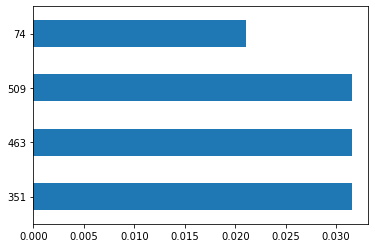

In [16]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(7, 7))


sns.histplot(data=dataset, x=X[74], kde=True, color="skyblue", hue=X[0], ax=axs[0,0])
sns.histplot(data=dataset, x=X[509], kde=True, color="skyblue", hue=X[0], ax=axs[0,1])
sns.histplot(data=dataset, x=X[463], kde=True, color="skyblue", hue=X[0], ax=axs[1,0])
sns.histplot(data=dataset, x=X[351], kde=True, color="skyblue", hue=X[0], ax=axs[1,1])